In [7]:
import matplotlib.pyplot as plt
from torchvision import transforms
from dataset import utils
from dataset.cub2011 import Cub2011
from dataset.CombinedDataLoader import CDL

ModuleNotFoundError: No module named 'cv2'


Root for data

In [5]:
root = './dataset/data'

Create dataloader to download data.

In [6]:
ds_whole = Cub2011(root, train=None, download=True, transform=transforms.ToTensor())

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1131)>

Crop images corresponding to boxes

In [4]:
utils.crop_all_images(root)

Create Augmentations

Grayscale

In [5]:
aug_gray = transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
name_gray = 'grayscale'
utils.augmentation_on_all_images(root, aug_gray, name_gray)

Gaussian blur

In [6]:
aug_gaus = transforms.Compose([transforms.GaussianBlur(kernel_size=5), transforms.ToTensor()])
name_gaus = 'gaussianBlur'
utils.augmentation_on_all_images(root, aug_gaus, name_gaus)

Color Jittering

In [7]:
aug_jitt = transforms.Compose([transforms.ColorJitter(brightness=.5, saturation=0.1, hue=.3), transforms.ToTensor()])
name_jitt = 'colorJitter'
utils.augmentation_on_all_images(root, aug_jitt, name_jitt)

Data Loader

In [8]:
ds_one = CDL(root, train=None, transform=transforms.ToTensor(), num_classes=3)

In [9]:
print(len(ds_one))

178


In [10]:
ds_all = CDL(root, train=None, transform=transforms.ToTensor(), num_classes=3, images=['images', 'cropped', name_gray, name_gaus, name_jitt])

In [11]:
print(len(ds_all))

890


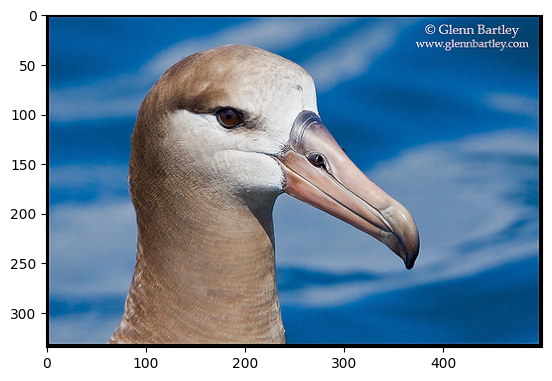

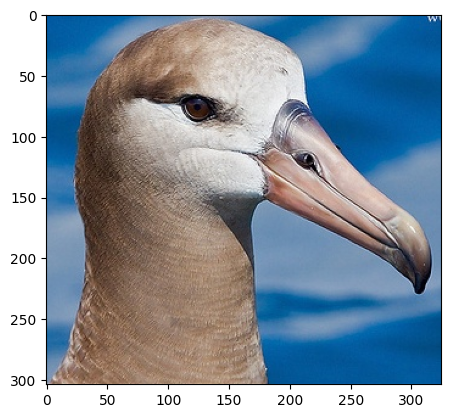

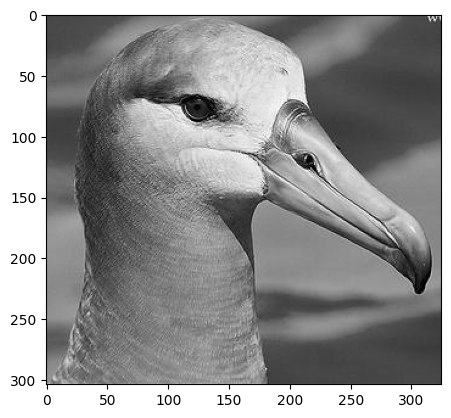

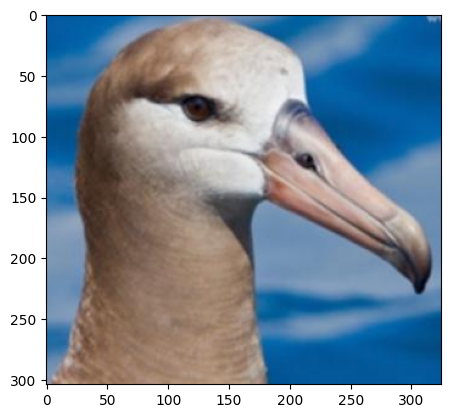

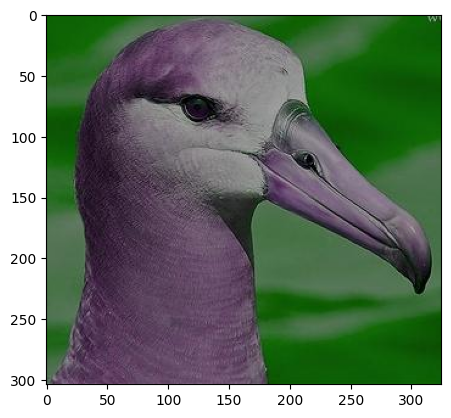

In [12]:
for i in range(5):
    plt.imshow(utils.transform_to_show(ds_all[i * len(ds_one)]))
    plt.show()